In [1]:
#https://www.youtube.com/watch?v=Y7XBsFzByTQ

import sys
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

#https://towardsdatascience.com/the-simplest-way-of-making-gifs-and-math-videos-with-python-aec41da74c6e
#import celluloid
from celluloid import Camera # getting the camera
from IPython.display import HTML # to show the animation in Jupyter

#creates a figure with 10 (width) x 5 (height) inches
plt.rcParams['figure.figsize'] = [5, 5]
np.set_printoptions(threshold=sys.maxsize)


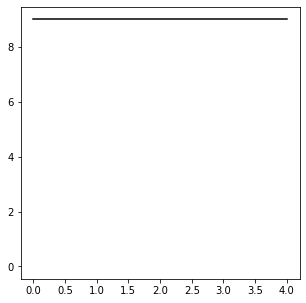

In [2]:
fig, ax = plt.subplots() # creating my fig

camera = Camera(fig)# the camera gets the fig we'll plot

for i in range(10):
    ax.plot([i] * 5, c='black') # 5 element array from 0 to 9
    camera.snap() # the camera takes a snapshot of the plot
    
animation = camera.animate() # animation ready
#Note: sudo apt install ffmpeg
HTML(animation.to_html5_video()) # displaying the animation

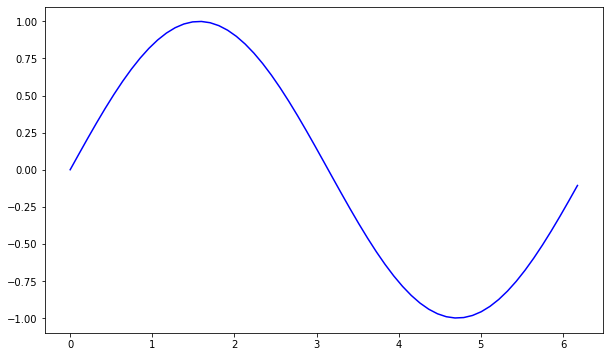

In [3]:
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(10, 6)) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
x = np.linspace(0, np.pi*2, 60) # a sine circle
y = np.sin(x) # sine
for i in range(len(x)):
    #x_t = x[:i] # current dataset
    x_t = x[:i] 
    y_t = y[:i] # current sine
    ax.plot(x_t, y_t, c='blue')
    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video())

(731, 474, 3)
Resized Dimensions :  (731, 474, 3)


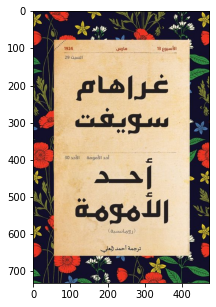

In [14]:
#https://matplotlib.org/stable/tutorials/colors/colormaps.html (for color maps)

#img_ocr_perfect = cv2.imread("/home/mostafa/Desktop/OCR/01_ocr_perfect.jpg")
image = cv2.imread("/home/mostafa/Desktop/OCR/book_cover_arabic_realistic.jpg")
print(image.shape)

scale_percent = 100 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
  
# resize image
image = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',image.shape)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [15]:
text = pytesseract.image_to_string(image)
print('pytesseract text ',text)

pytesseract text   



True

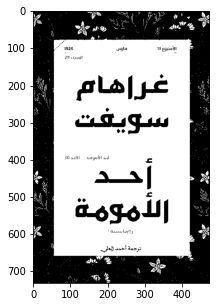

In [16]:
#https://note.nkmk.me/en/python-numpy-opencv-image-binarization/
im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

th, im_gray_th_otsu = cv2.threshold(im_gray, 0, 255, cv2.THRESH_OTSU)

plt.imshow(cv2.cvtColor(im_gray_th_otsu,cv2.COLOR_BGR2RGB))

cv2.imwrite('/home/mostafa/Desktop/OCR/outputs/thresholded_otsu_test1.jpg', im_gray_th_otsu)

Text(0, 0.5, 'Area')

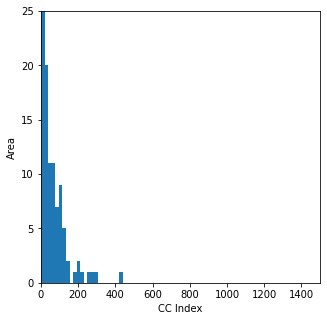

In [91]:
#https://www.pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/

# apply connected component analysis to the thresholded image
(numLabels, labels, stats, centroids) = cv2.connectedComponentsWithStats(im_gray_th_otsu, 4 , cv2.CV_32S)

areas = stats[:, cv2.CC_STAT_AREA][1:]

# density=False would make counts

plt.hist(areas, density=False, bins=10000) 
plt.axis([0, 1500, 0, 25]) 
##axis([xmin,xmax,ymin,ymax])
plt.xlabel('CC Index')
plt.ylabel('Area')


-> 2 / 729 /area= 54
-> 3 / 729 /area= 126
-> 13 / 729 /area= 27
-> 19 / 729 /area= 75
-> 23 / 729 /area= 92
-> 24 / 729 /area= 45
-> 31 / 729 /area= 25
-> 36 / 729 /area= 199
-> 41 / 729 /area= 29
-> 45 / 729 /area= 70
-> 49 / 729 /area= 200
-> 57 / 729 /area= 30
-> 73 / 729 /area= 70
-> 78 / 729 /area= 48
-> 79 / 729 /area= 86
-> 86 / 729 /area= 120
-> 94 / 729 /area= 94
-> 110 / 729 /area= 136
-> 118 / 729 /area= 97
-> 119 / 729 /area= 54
-> 121 / 729 /area= 94
-> 124 / 729 /area= 33
-> 126 / 729 /area= 296
-> 127 / 729 /area= 89
-> 128 / 729 /area= 97
-> 136 / 729 /area= 43
-> 144 / 729 /area= 44
-> 236 / 729 /area= 45
-> 243 / 729 /area= 29
-> 247 / 729 /area= 50
-> 250 / 729 /area= 103
-> 251 / 729 /area= 54
-> 257 / 729 /area= 50
-> 280 / 729 /area= 31
-> 293 / 729 /area= 30
-> 373 / 729 /area= 98
-> 374 / 729 /area= 106
-> 450 / 729 /area= 72
-> 451 / 729 /area= 222
-> 452 / 729 /area= 142
-> 453 / 729 /area= 70
-> 454 / 729 /area= 68
-> 456 / 729 /area= 65
-> 462 / 729 /area= 

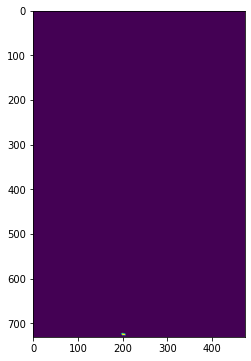

In [96]:
output = resized.copy()    
fig, ax = plt.subplots(figsize=(10, 6)); # creating my fig
camera = Camera(fig);# the camera gets the fig we'll plot

# loop over the number of unique connected component labels
for i in range(0, numLabels):
    if stats[i, cv2.CC_STAT_AREA]<25 or stats[i,cv2.CC_STAT_AREA]>147000:
        continue
    print("->",i,"/",numLabels,"/area=",stats[i, cv2.CC_STAT_AREA])
    
    cv2.rectangle(output, (stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP]),
                  (stats[i, cv2.CC_STAT_LEFT] + stats[i, cv2.CC_STAT_WIDTH],
                   stats[i, cv2.CC_STAT_TOP] + stats[i, cv2.CC_STAT_HEIGHT]),
                  (0, 255, 0), 5)
    
    #
    #cv2.circle(output, (int(centroids[i][0]), int(centroids[i][1])), 1, (0, 0, 255), 5)

    # construct a mask for the current connected component by
    # finding a pixels in the labels array that have the current
    # connected component ID
    componentMask = (labels == i).astype("uint8") * 255
    # show our output image and connected component mask
    ax.imshow(componentMask) # plotting
    
    camera.snap() # the camera takes a snapshot of the plot
#plt.imshow(output)

In [98]:
animation = camera.animate() # animation ready
print("animation done")

#Note: sudo apt install ffmpeg
HTML(animation.to_html5_video()) # displaying the animation
print("convert to html5 video done")

#plt.imshow(componentMask,cmap='gray',vmin=0,vmax=255)

animation done
convert to html5 video done


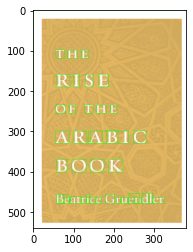

In [13]:
imboxes=pytesseract.image_to_boxes(resized)

for boxes in imboxes.splitlines():
    boxes=boxes.split(' ')
    x,y,w,h=int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(resized,(x,height-y),(w,height-h),(0,255,0),1)
    
plt.imshow(cv2.cvtColor(resized,cv2.COLOR_BGR2RGB))

In [14]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN